# Análise exploratória dos atributos numéricos (Discretos de razão)

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
np.random.seed(777)

df = pd.read_csv('../data/XOHE.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [39]:
ratio = ['Age at enrollment',
         'Curricular units 1st sem (credited)',
         'Curricular units 1st sem (enrolled)',
         'Curricular units 1st sem (evaluations)',
         'Curricular units 1st sem (approved)',
         'Curricular units 1st sem (grade)',
         'Curricular units 1st sem (without evaluations)',
         'Curricular units 2nd sem (credited)',
         'Curricular units 2nd sem (enrolled)',
         'Curricular units 2nd sem (evaluations)',
         'Curricular units 2nd sem (approved)',
         'Curricular units 2nd sem (grade)',
         'Curricular units 2nd sem (without evaluations)',
         'Unemployment rate',
         'Inflation rate', 
         'GDP',
         'Target_Dropout','Target_Enrolled','Target_Graduate']

In [40]:
X_r = X[ratio]

In [41]:
X_train, _, _, _ = train_test_split(X_r, y, train_size=0.8, stratify=y, random_state=777)

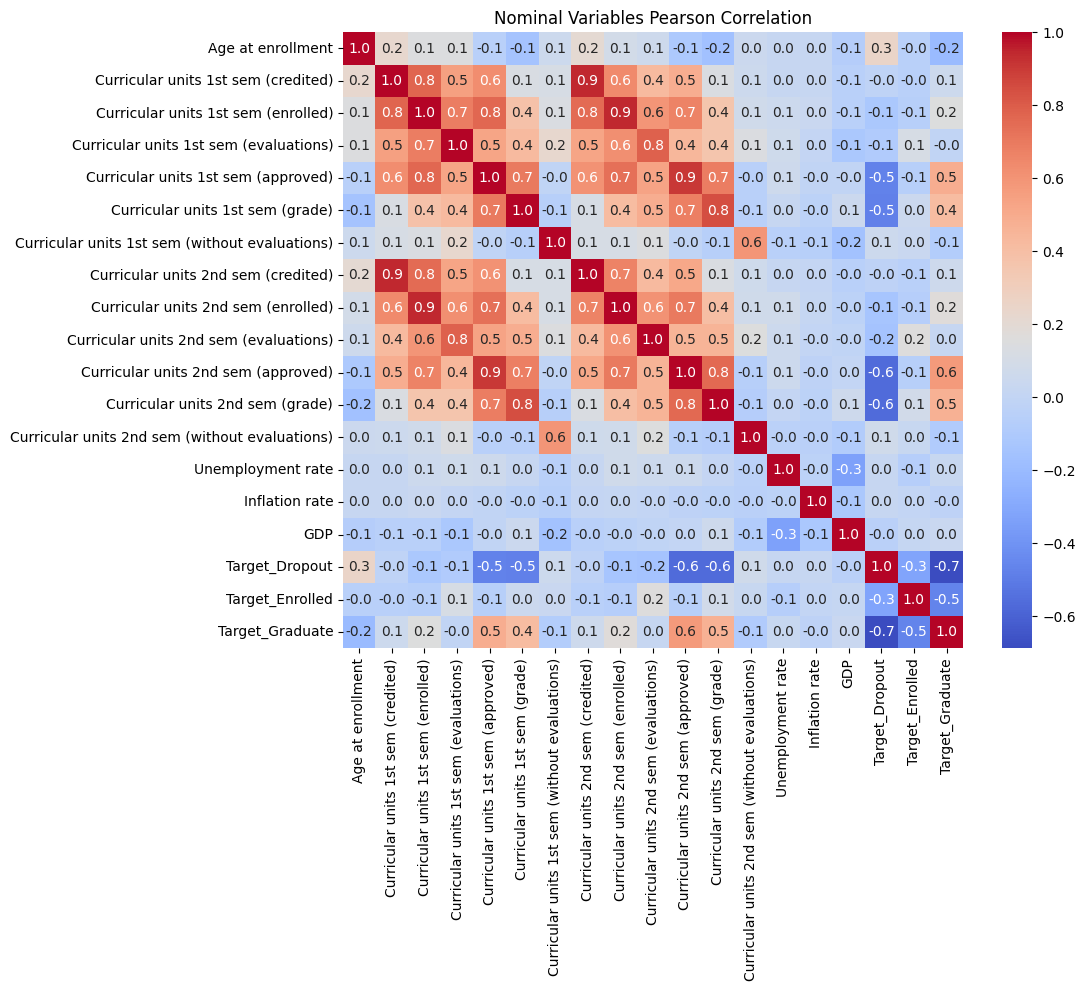

In [42]:
peason_corr = X_train.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()

In [43]:
X_train_targetless = X_train.drop(columns=['Target_Dropout','Target_Enrolled','Target_Graduate'])

In [44]:
X_train_targetless = sm.add_constant(X_train_targetless)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_targetless.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_targetless.values, i) for i in range(X_train_targetless.shape[1])]

print(vif_data[vif_data['VIF'] > 5])

                                Feature        VIF
0                                 const  48.954684
2   Curricular units 1st sem (credited)  16.116581
3   Curricular units 1st sem (enrolled)  23.381803
5   Curricular units 1st sem (approved)  12.602160
6      Curricular units 1st sem (grade)   5.038442
8   Curricular units 2nd sem (credited)  12.643891
9   Curricular units 2nd sem (enrolled)  16.187228
11  Curricular units 2nd sem (approved)   9.868194
12     Curricular units 2nd sem (grade)   5.496849


In [45]:
print(vif_data[vif_data['VIF'] <= 5])

                                           Feature       VIF
1                                Age at enrollment  1.164082
4           Curricular units 1st sem (evaluations)  4.047074
7   Curricular units 1st sem (without evaluations)  1.692666
10          Curricular units 2nd sem (evaluations)  3.389807
13  Curricular units 2nd sem (without evaluations)  1.603108
14                               Unemployment rate  1.180402
15                                  Inflation rate  1.038184
16                                             GDP  1.228492


In [46]:
drop_candidates = vif_data[vif_data['Feature'] != 'const']
drop_candidates = drop_candidates[vif_data['VIF'] > 5]['Feature']

C:\Users\Felipe Castro\AppData\Local\Temp\ipykernel_15812\1341915933.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drop_candidates = drop_candidates[vif_data['VIF'] > 5]['Feature']


In [47]:
drop_candidates = drop_candidates.to_numpy()

In [48]:
drop_candidates = np.append(drop_candidates, ['Target_Dropout','Target_Enrolled','Target_Graduate'])

In [49]:
drop_candidates

array(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target_Dropout',
       'Target_Enrolled', 'Target_Graduate'], dtype=object)

In [50]:
X_train_drop_candidates = X_train[drop_candidates]
X_train_drop_candidates

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target_Dropout,Target_Enrolled,Target_Graduate
1072,0,6,4,12.500000,0,6,5,12.500000,0.0,1.0,0.0
3248,0,5,5,11.600000,0,5,5,11.400000,0.0,0.0,1.0
1601,0,6,6,12.285714,0,6,4,14.250000,0.0,1.0,0.0
4279,0,6,0,0.000000,0,6,0,0.000000,1.0,0.0,0.0
900,0,5,2,10.000000,0,5,2,14.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
827,0,6,6,15.833333,0,6,6,15.333333,0.0,0.0,1.0
4282,0,5,4,10.750000,0,5,3,10.571429,1.0,0.0,0.0
4077,0,6,2,11.000000,0,6,0,0.000000,1.0,0.0,0.0
1994,0,6,0,0.000000,0,6,0,0.000000,1.0,0.0,0.0


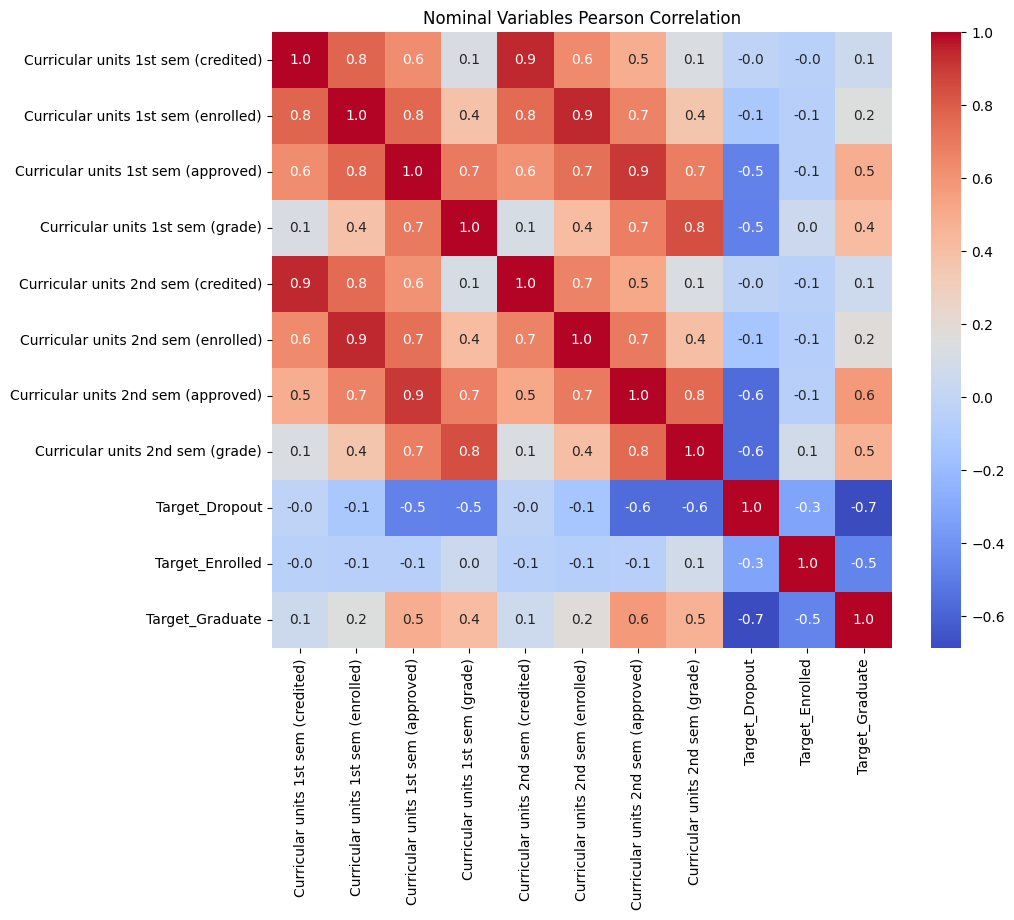

In [51]:
peason_corr = X_train_drop_candidates.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()

## Conclusão

Removeremos as variaveis com maior colinearidade e menor correlação com o Target

In [52]:
peason_corr.columns

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target_Dropout', 'Target_Enrolled',
       'Target_Graduate'],
      dtype='object')

In [53]:
drop_columns = [
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (grade)'
       ]

In [55]:
df_nocolinear.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,0,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,0,9.4,-0.8,-3.12,Graduate,0.0,0.0,1.0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,0,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0


In [56]:
df_nocolinear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [57]:
keep_candidates = vif_data[vif_data['VIF'] <= 5]
keep_candidates = keep_candidates['Feature']
keep_candidates = keep_candidates.to_numpy()

In [58]:
suco = X_train[keep_candidates]

In [59]:
suco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 1072 to 1939
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age at enrollment                               3539 non-null   int64  
 1   Curricular units 1st sem (evaluations)          3539 non-null   int64  
 2   Curricular units 1st sem (without evaluations)  3539 non-null   int64  
 3   Curricular units 2nd sem (evaluations)          3539 non-null   int64  
 4   Curricular units 2nd sem (without evaluations)  3539 non-null   int64  
 5   Unemployment rate                               3539 non-null   float64
 6   Inflation rate                                  3539 non-null   float64
 7   GDP                                             3539 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 248.8 KB


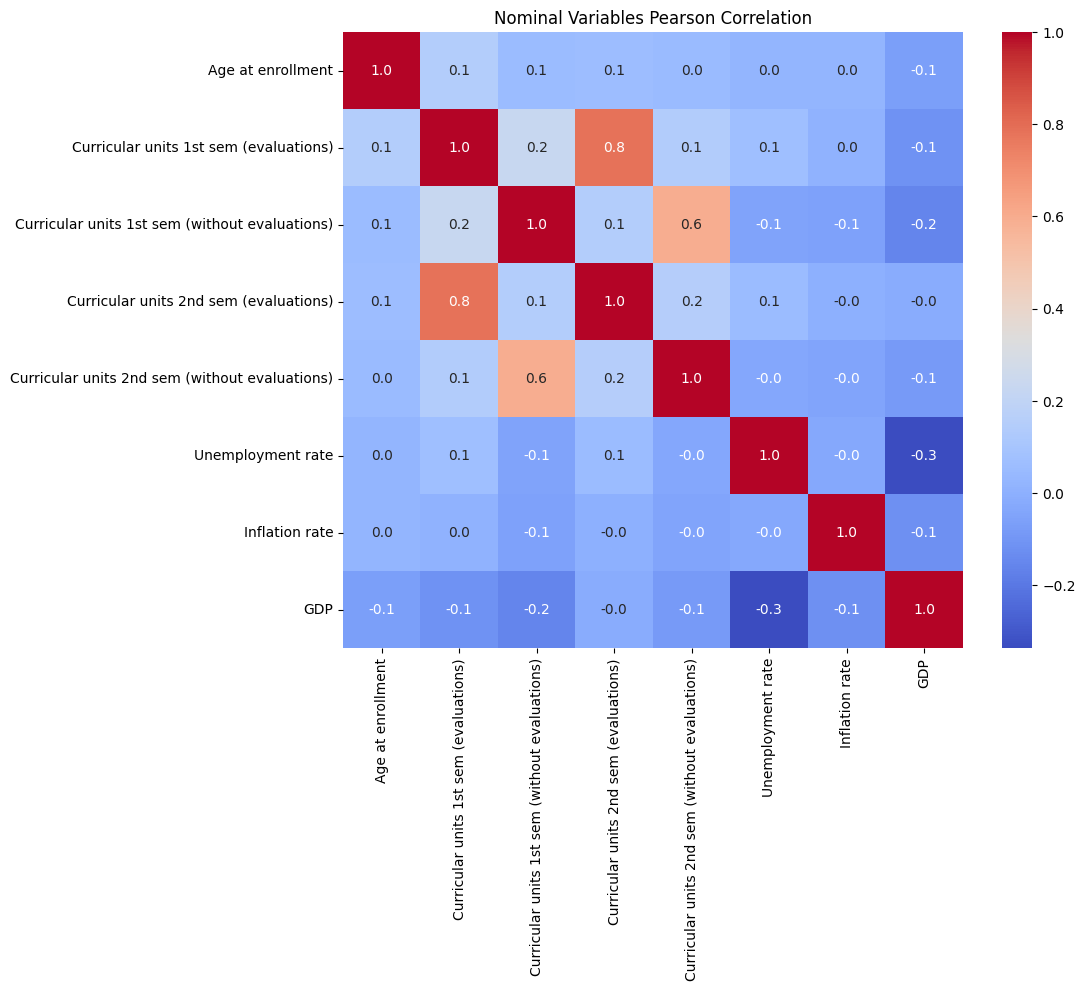

In [60]:
pearson_corr = suco.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()

In [61]:
drop_columns.append('Curricular units 1st sem (evaluations)')
drop_columns.append('Curricular units 1st sem (without evaluations)')
drop_columns.append('Curricular units 2nd sem (evaluations)')
drop_columns.append('Curricular units 2nd sem (without evaluations)')

In [62]:
drop_columns

['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (without evaluations)']

In [63]:
df_nocolinear = df.drop(columns=drop_columns)

In [64]:
df_nocolinear

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,International,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Unemployment rate,Inflation rate,GDP,Target,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0,10.8,1.4,1.74,Dropout,1.0,0.0,0.0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,5,9.4,-0.8,-3.12,Graduate,0.0,0.0,1.0
4,2,12,1,3,0,1,1,22,28,10,...,0,5,6,13.9,-0.3,0.79,Graduate,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,5,5,15.5,2.8,-4.06,Graduate,0.0,0.0,1.0
4420,1,1,2,15,1,1,19,1,1,10,...,1,6,2,11.1,0.6,2.02,Dropout,1.0,0.0,0.0
4421,1,1,1,12,1,1,1,22,27,10,...,0,7,1,13.9,-0.3,0.79,Dropout,1.0,0.0,0.0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,5,9.4,-0.8,-3.12,Graduate,0.0,0.0,1.0
